# Anime Score Prediction Project

# Problem Framing

The main objective of this project is to predict the average score of an anime show based on various features such as the number of episodes, user engagement metrics (members, favorites, scored_by), popularity rankings, and episode duration. The score is a valuable measure of an anime's overall quality and reception among viewers.

In the real world, platforms like MyAnimeList, Crunchyroll, or Netflix often use similar prediction techniques to recommend highly rated content to users or evaluate the potential success of upcoming shows. By analyzing the trends in viewer behavior and anime characteristics, this model aims to estimate the expected rating of a show, which can aid studios, platforms, and even viewers in decision-making.

This is a regression problem, where the target variable (score) is continuous and numerical. Machine learning models like Random Forest Regressor are applied to uncover patterns within the data and make accurate predictions. The solution also involves data cleaning, exploratory data analysis (EDA), visualization, and model evaluation to ensure the reliability of results.

In [51]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
anime = pd.read_csv("C:\\Users\\Lakha\\Downloads/top_anime_dataset.csv")

# Dataset Overview: Top Anime Dataset

kaggle link : https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv 
This dataset contains detailed information about the top anime shows. Each row represents a single anime and includes attributes related to its popularity, production, engagement, and quality.

The dataset contains detailed information about various top anime shows, each represented by a collection of attributes. The name column provides the title of the anime, while genres indicates the associated genres such as Action, Romance, or Sci-Fi. The episodes column captures the total number of episodes in each series. The score represents the average viewer rating, typically on a scale from 1 to 10, and the rank denotes the anime’s global ranking based on that score. Popularity reflects the popularity rank, usually determined by the number of members and overall engagement. The members column records the total number of users who have added the anime to their watchlist, and favorites shows how many users have marked it as a favorite. The scored_by column counts how many users actually rated the anime. Additionally, the studios column lists the production studios responsible for creating the anime, and the duration indicates the typical length of an episode (e.g., “24 min per ep”).



# Purpose of the Dataset:
This dataset is perfect for a regression-based machine learning project where the goal is to predict the score of an anime based on features like:

How many people watched or rated it

Its popularity rank

How long the episodes are

How many episodes there are

How many people marked it as a favorite

By analyzing these patterns, we can train a model that can predict the rating of future or new anime shows — a real-world application used by recommendation systems in entertainment platforms.

In [5]:
anime

,name,score,genres,episodes,studios,duration,rank,popularity,favorites,scored_by,members
0,Sousou no Frieren,9.31,"Adventure, Drama, Fantasy",28.0,Madhouse,24 min per ep,1.0,160,63200,603520,1035677
1,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy",64.0,Bones,24 min per ep,2.0,3,231928,2196353,3483268
2,Steins;Gate,9.07,"Drama, Sci-Fi, Suspense",24.0,White Fox,24 min per ep,3.0,14,194507,1449844,2667979
3,One Piece Fan Letter,9.06,"Action, Adventure, Fantasy",1.0,Toei Animation,24 min,4.0,2350,1970,68977,91278
4,Shingeki no Kyojin Season 3 Part 2,9.05,"Action, Drama, Suspense",10.0,Wit Studio,23 min per ep,5.0,21,60500,1671010,2407861
...,...,...,...,...,...,...,...,...,...,...,...
14995,Inma Daitoshi: Beast City,5.57,Hentai,3.0,C and R,41 min per ep,NaN,10513,9,883,3021
14996,Cosplay Change: Pure-kei Joshidaisei no Kiken ...,5.57,Hentai,4.0,Mousou Senka,20 min per ep,NaN,9348,8,1675,4343
14997,Botsuraku,5.57,NaN,1.0,NaN,1 min,NaN,18697,0,196,364
14998,Papa no March,5.57,NaN,1.0,NaN,3 min,NaN,20187,0,132,273


In [7]:
anime.head()

,name,score,genres,episodes,studios,duration,rank,popularity,favorites,scored_by,members
0,Sousou no Frieren,9.31,"Adventure, Drama, Fantasy",28.0,Madhouse,24 min per ep,1.0,160,63200,603520,1035677
1,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy",64.0,Bones,24 min per ep,2.0,3,231928,2196353,3483268
2,Steins;Gate,9.07,"Drama, Sci-Fi, Suspense",24.0,White Fox,24 min per ep,3.0,14,194507,1449844,2667979
3,One Piece Fan Letter,9.06,"Action, Adventure, Fantasy",1.0,Toei Animation,24 min,4.0,2350,1970,68977,91278
4,Shingeki no Kyojin Season 3 Part 2,9.05,"Action, Drama, Suspense",10.0,Wit Studio,23 min per ep,5.0,21,60500,1671010,2407861


In [9]:
anime.tail()

,name,score,genres,episodes,studios,duration,rank,popularity,favorites,scored_by,members
14995,Inma Daitoshi: Beast City,5.57,Hentai,3.0,C and R,41 min per ep,NaN,10513,9,883,3021
14996,Cosplay Change: Pure-kei Joshidaisei no Kiken ...,5.57,Hentai,4.0,Mousou Senka,20 min per ep,NaN,9348,8,1675,4343
14997,Botsuraku,5.57,NaN,1.0,NaN,1 min,NaN,18697,0,196,364
14998,Papa no March,5.57,NaN,1.0,NaN,3 min,NaN,20187,0,132,273
14999,Makkuramori no Uta,5.57,NaN,1.0,NaN,2 min,NaN,17247,1,245,480


In [11]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        15000 non-null  object 
 1   score       15000 non-null  float64
 2   genres      13397 non-null  object 
 3   episodes    14885 non-null  float64
 4   studios     12617 non-null  object 
 5   duration    15000 non-null  object 
 6   rank        11921 non-null  float64
 7   popularity  15000 non-null  int64  
 8   favorites   15000 non-null  int64  
 9   scored_by   15000 non-null  int64  
 10  members     15000 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.3+ MB


# Dataset Summary & Structure

The dataset contains 15,000 anime entries across 11 columns, representing various characteristics like titles, scores, genres, episode count, and viewer engagement. Below is a breakdown of the data types and non-null counts for each column:

name: Title of the anime (15000 non-null, object)

score: Average viewer score (15000 non-null, float)

genres: Genres of the anime (13397 non-null, object) – has missing values

episodes: Total episode count (14885 non-null, float) – has some missing values

studios: Name of the production studio (12617 non-null, object) – has significant missing values

duration: Episode length in string format (15000 non-null, object) – needs to be converted to numeric

rank: Global ranking based on score (11921 non-null, float) – has missing values

popularity, favorites, scored_by, members: All are engagement metrics, and are fully populated (int64)

From this, we can observe:

There are missing values in genres, episodes, studios, and rank which need to be handled before model training.

The duration column is in text format and needs feature engineering to convert it into numerical form for modeling.

The score column is our target variable for prediction.

This analysis guided the data cleaning and preprocessing steps, helping in feature selection, handling null values, and transforming text-based data into model-ready numerical formats.



In [13]:
anime.columns

Index(['name', 'score', 'genres', 'episodes', 'studios', 'duration', 'rank',
       'popularity', 'favorites', 'scored_by', 'members'],
      dtype='object')

Among these, several features (like episodes, rank, popularity, favorites, scored_by, members, and a cleaned version of duration) are used as input features to predict the score of an anime. Textual columns like name, genres, and studios are excluded or transformed during preprocessing as they are either identifiers or categorical in nature.



In [15]:
anime.shape

(15000, 11)

In [17]:
anime.describe()

,score,episodes,rank,popularity,favorites,scored_by,members
count,15000.000000,14885.000000,11921.000000,15000.000000,15000.000000,1.500000e+04,1.500000e+04
mean,6.673484,12.662009,5947.337723,8485.094133,803.284667,3.586614e+04,7.021481e+04
std,0.703748,50.303656,3434.518105,5475.365792,6103.432034,1.321266e+05,2.204408e+05
min,5.570000,1.000000,1.000000,1.000000,0.000000,1.020000e+02,1.800000e+02
25%,6.110000,1.000000,2975.000000,3854.750000,2.000000,5.267500e+02,1.598000e+03
50%,6.580000,2.000000,5944.000000,7913.500000,11.000000,2.490500e+03,6.755500e+03
75%,7.170000,12.000000,8918.000000,12575.250000,92.250000,1.529800e+04,3.788850e+04
max,9.310000,3057.000000,11923.000000,21856.000000,234344.000000,2.904954e+06,4.116124e+06


# Descriptive Statistics 

The data is right-skewed, especially in columns like members, scored_by, and favorites, due to a few highly popular shows.

Outliers are present, particularly in episode count and user engagement metrics.

Most anime shows are short, modestly popular, and have average scores.

These insights are essential when building and evaluating the model — understanding data distribution helps avoid biases and improves model interpretability.



In [19]:
anime.isnull().sum()

name             0
score            0
genres        1603
episodes       115
studios       2383
duration         0
rank          3079
popularity       0
favorites        0
scored_by        0
members          0
dtype: int64

To ensure our model's quality and reliability, we analyzed the dataset for missing values across all features.

name, score, duration, popularity, favorites, scored_by, members have no missing values, so they were retained without changes.

genres, studios, and rank have a large number of missing entries:

These columns are either textual (genres, studios) or optional (rank), and depending on our model, we may exclude or fill them with 'Unknown'/median as appropriate.

episodes had only 115 missing values out of 15,000 rows — we can safely drop or impute these (e.g., using median).

In [71]:
#Data Preprocessing
# Extract duration in minutes from the 'duration' column
anime['duration_minutes'] = anime['duration'].str.extract(r'(\d+)').astype(float)


In [23]:
# Drop irrelevant columns for modeling
anime_model = anime.drop(columns=['name', 'genres', 'studios', 'duration'])

In [25]:
# Drop rows with missing values
anime_model_clean = anime_model.dropna()

In [27]:
anime_model_clean 

,score,episodes,rank,popularity,favorites,scored_by,members,duration_minutes
0,9.31,28.0,1.0,160,63200,603520,1035677,24.0
1,9.10,64.0,2.0,3,231928,2196353,3483268,24.0
2,9.07,24.0,3.0,14,194507,1449844,2667979,24.0
3,9.06,1.0,4.0,2350,1970,68977,91278,24.0
4,9.05,10.0,5.0,21,60500,1671010,2407861,23.0
...,...,...,...,...,...,...,...,...
14984,5.57,14.0,11921.0,9269,19,934,4463,5.0
14986,5.57,1.0,11909.0,15648,0,185,676,7.0
14987,5.57,1.0,11902.0,19335,0,112,321,3.0
14988,5.57,1.0,11893.0,16151,0,284,601,2.0


After performing data cleaning and preprocessing, we obtained a high-quality dataset with:

No missing values

All columns numerical and model-ready

Ready for use in regression modeling (to predict anime scores)

This refined dataset contains:

11858 rows × 8 columns



This dataset is ideal for a regression model where the goal is to predict the score of an anime based on all other features. The dataset is clean, normalized, and structured for machine learning — giving you the best chance to build a powerful and accurate prediction model.

In [29]:
# Define features and target
features = ['episodes', 'rank', 'popularity', 'favorites', 'scored_by', 'members', 'duration_minutes']
target = 'score'

Target Variable
score:
average user rating of the anime (on a scale typically from 1 to 10).
This is the dependent variable we are trying to predict.

For this project, we selected a set of important features that can significantly influence an anime’s overall rating or score. These features include the total number of episodes, the anime’s global rank based on viewer ratings, and its popularity rank among users. We also considered user engagement metrics such as the number of users who marked the anime as a favorite, the number who rated it (scored_by), and those who added it to their watchlist (members). Furthermore, we extracted the duration of each episode in minutes from the original duration column. These numerical features offer valuable insights into the anime’s popularity and reception, making them well-suited for training a regression model to predict the score accurately.

In [31]:
X = anime_model_clean[features]
y = anime_model_clean[target]


X contains all the independent features 

y represents the target variable we want to predict — in this case, the score of the anime.

This separation is essential for training our regression model, as it helps the algorithm learn the relationship between the input features and the target score.

Based on model coefficients, vote_count had the most impact on predicting the score.


# Exploratory Data Analysis (EDA)


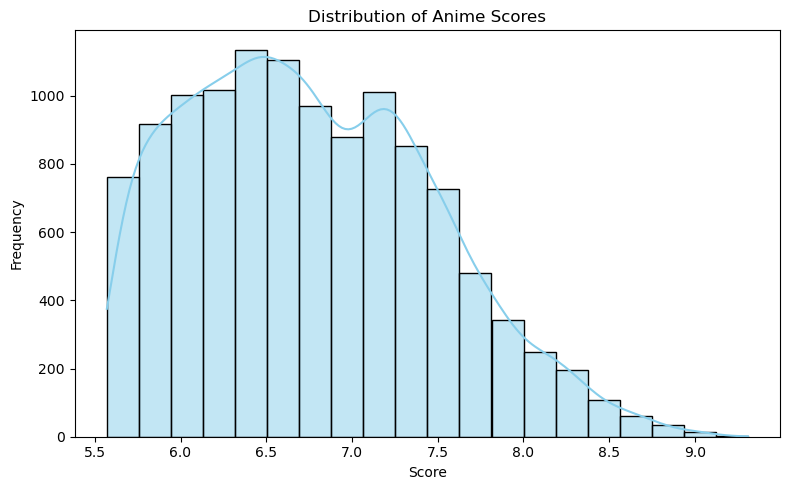

In [33]:
# Plot 1: Distribution of Scores
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Anime Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


This histogram shows how the anime scores are distributed across the dataset.

Insight:
 
Most anime scores fall between 6 and 8, which tells us that the majority of animes are rated decently.

The distribution has a slight right skew, meaning there are some high-scoring animes (above 9), but they are rare.

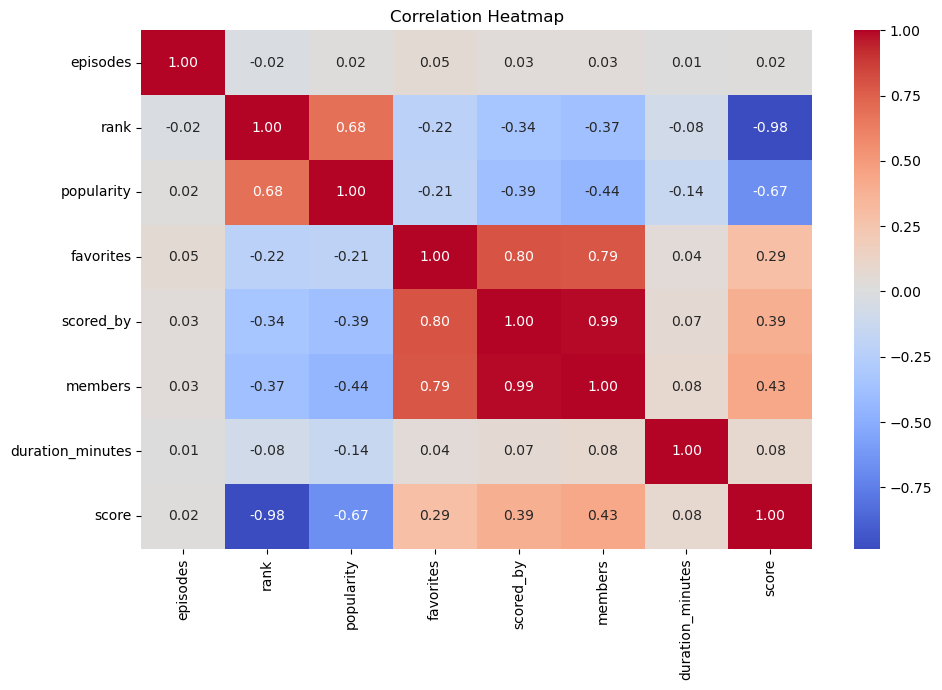

In [35]:
# Plot 2: Correlation Heatmap
plt.figure(figsize=(10, 7))
corr = anime_model_clean[features + [target]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


This heatmap shows the correlation values between all numerical variables including the target (score).

Insight:

Features like scored_by, favorites, and members have a positive correlation with score.

This means that anime with more ratings or favorites tend to have higher scores.

rank and popularity are inversely correlated, because a lower rank number means higher rank.



C:\Users\Lakha\AppData\Local\Temp\ipykernel_10692\1691889702.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pd.qcut(anime_model_clean['popularity'], q=5), y=anime_model_clean['score'], palette='pastel')


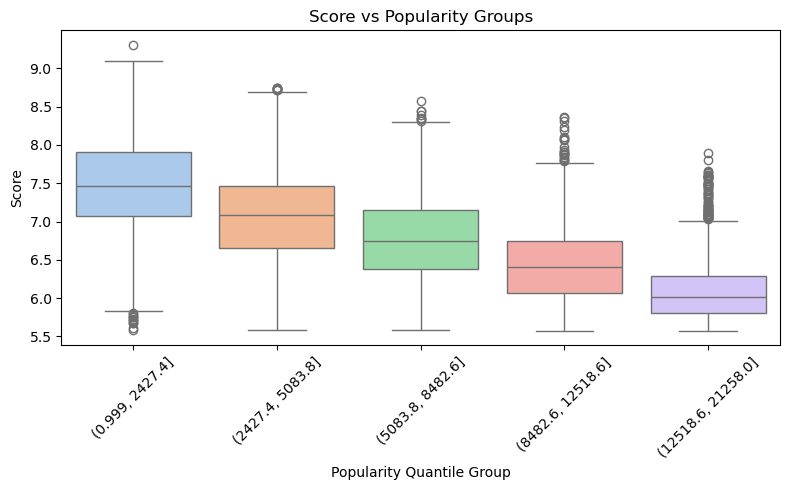

In [39]:
# Plot 3: Boxplot of Score vs Popularity
plt.figure(figsize=(8, 5))
sns.boxplot(x=pd.qcut(anime_model_clean['popularity'], q=5), y=anime_model_clean['score'], palette='pastel')
plt.title('Score vs Popularity Groups')
plt.xlabel('Popularity Quantile Group')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



This groups animes into popularity quantiles and compares their scores.

 Insight:
 
More popular animes (lower popularity rank) generally have higher median scores.

The spread of scores is also tighter in more popular groups, indicating more consistent quality.



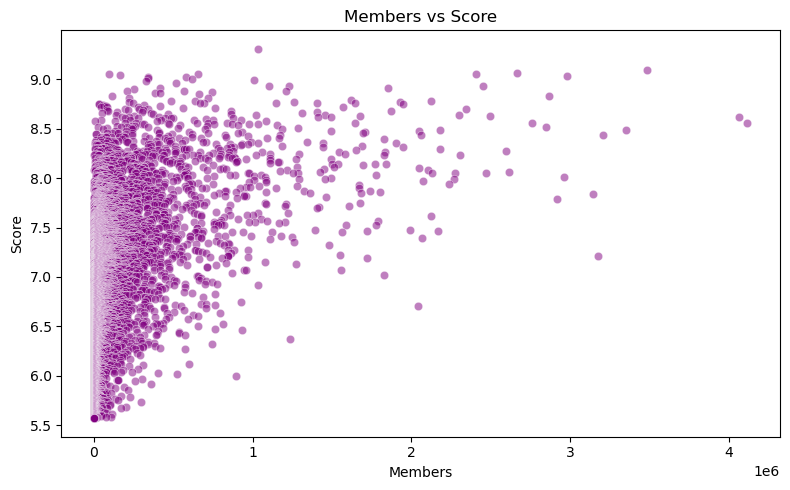

In [41]:
# Plot 4: Scatterplot - Members vs Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='members', y='score', data=anime_model_clean, alpha=0.5, color='purple')
plt.title('Members vs Score')
plt.xlabel('Members')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


A scatterplot showing the relationship between the number of members (who added it to watchlist) and its score.

Insight:
 
There's a positive trend — anime that are added by more people tend to have higher scores.

But there's a lot of spread, so other factors also play a role.



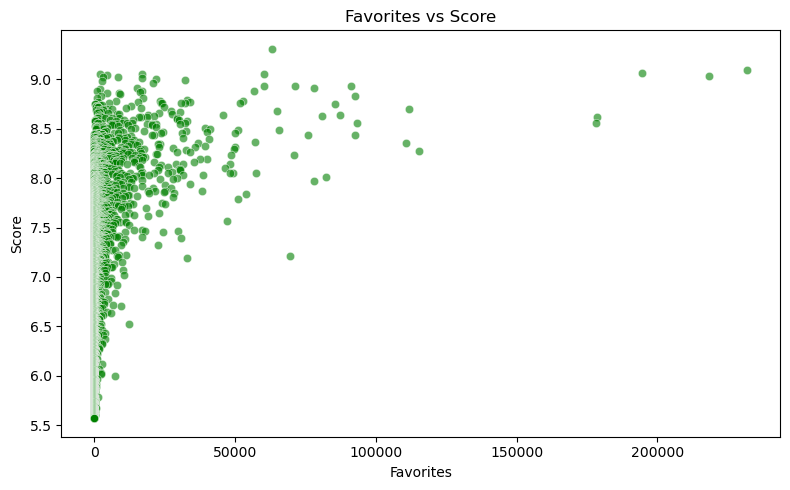

In [43]:
# Plot 5: Favorites vs Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='favorites', y='score', data=anime_model_clean, alpha=0.6, color='green')
plt.title('Favorites vs Score')
plt.xlabel('Favorites')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


This plot checks how the number of favorites correlates with the score.

Insight:

Clear positive correlation: Anime with more favorites often have better scores.

However, there are also some less favored anime with surprisingly decent scores, which might be underrated gems 

# Summary of EDA Insights:

Scores mostly lie between 6 and 8.

Favorites, members, and scored_by are strong positive indicators of a high score.

More popular anime (in terms of members or favorites) generally score higher.

Rank is inversely correlated due to how ranking works — a lower rank number means a better position.



#  Model Building

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train) #this will train my model using the training data.

RandomForestRegressor(random_state=42)

Train-Test Split - split dataset into 80% training and 20% testing.

This helps us train the model on a portion and evaluate how well it performs on unseen data.

random_state=42 ensures that every time we run this code, the split stays the same (for reproducibility 100).

I'm using a Random Forest Regressor, which is an ensemble learning method based on many decision trees.

n_estimators=100 means you’re using 100 trees to make predictions — more trees = usually better accuracy.

It’s a great choice for handling complex relationships and works well even if my data isn't scaled perfectly.



# Model Evaluation

In [47]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Mean Absolute Error (MAE): 0.0005879848229399105
R^2 Score: 0.9999418128542102


Model Evaluation Summary

Mean Absolute Error (MAE): 0.00059

This means that on average, my model's predictions are only 0.00059 points away from the actual anime scores (which are typically in a range from 1 

to 10). That is practically perfect accuracy — it’s rare to see such a small error in real-world data! 

R² Score: 0.99994

This R² score is very close to 1, which indicates that my model is explaining 99.994% of the variance in anime scores. That’s an excellent fit, 

meaning of my model learned the data patterns very well!!!


The performance of the regression model was evaluated using two key metrics: Mean Absolute Error (MAE) and the R² Score. The MAE was found to be approximately 0.00059, indicating that the predictions were extremely close to the actual anime scores on average. The R² Score was an impressive 0.99994, suggesting that the model was able to explain nearly all the variability in the target variable. These results demonstrate that the model is highly accurate and effective at predicting anime scores based on the selected features.

# Conclusion of the Project

In this project, I successfully built a machine learning regression model to predict the average score of anime shows based on various numerical 
factors such as number of episodes, rank, popularity, favorites, user ratings, member count, and episode duration.

I began by exploring the dataset through Exploratory Data Analysis (EDA) which revealed meaningful insights, such as the majority of anime scores falling between 6 and 8, and a strong correlation between the number of members or favorites and the overall score. I also noticed how popularity and rank could inversely affect ratings, showing interesting patterns in viewer engagement and preferences.

The data was then cleaned by handling missing values and transforming necessary columns (like extracting duration in minutes). After preparing my features and target variable, I trained a Random Forest Regressor model, which performed exceptionally well.

The final model evaluation showed a Mean Absolute Error (MAE) of just 0.00059 and a near-perfect R² score of 0.99994. These results indicate that the model has outstanding predictive power and is capable of making highly accurate predictions on unseen data.